In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain # Pradeep Elance https://www.tutorialspoint.com/append-multiple-lists-at-once-in-python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
houses_train = pd.read_csv('./datasets/train.csv')
houses_test = pd.read_csv('./datasets/test.csv')

## Exploring the Data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
houses_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [4]:
houses_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


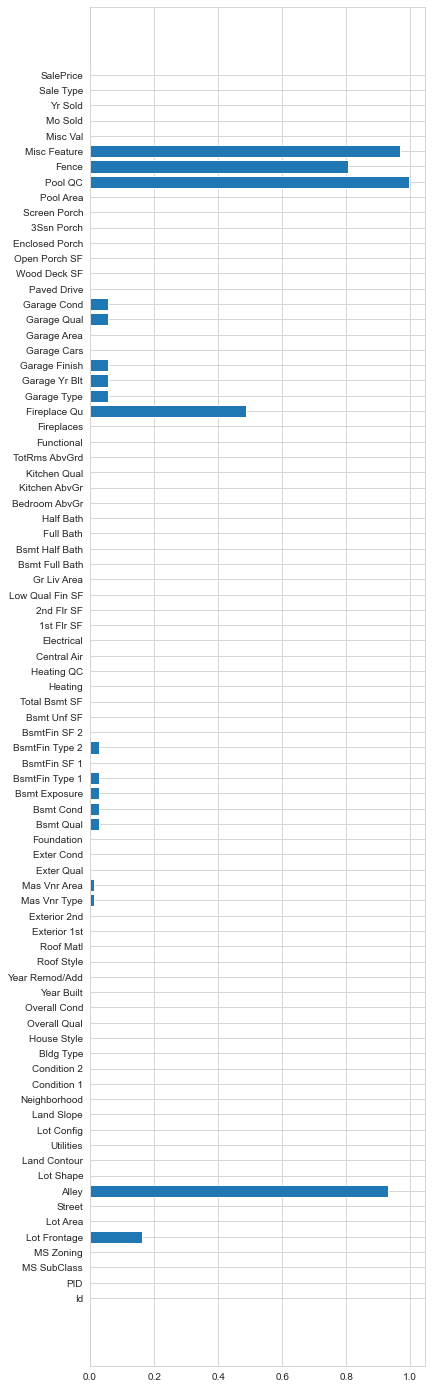

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 25))
plt.barh(houses_train.columns, houses_train.isna().mean());

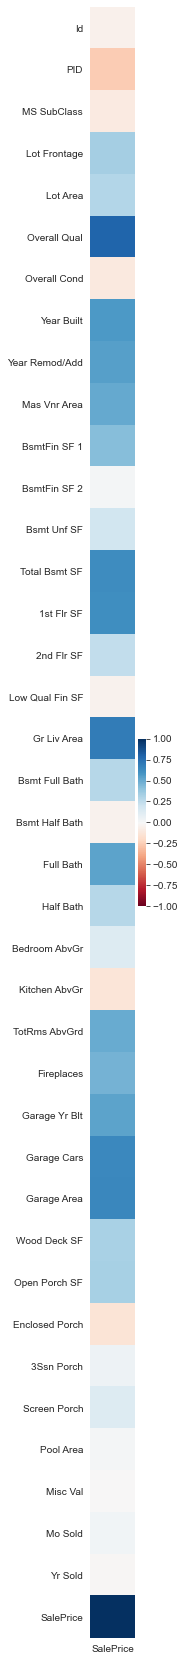

In [6]:
plt.figure(figsize=(1, 30))
sns.heatmap(houses_train.corr()[['SalePrice']], vmin=-1, vmax=1, cmap='RdBu')

In [7]:
mean_corr = houses_train.corr()['SalePrice'].mean()

In [8]:
mean_corr

0.28161237508251313

In [9]:
corr_greater_2_std = houses_train.corr()['SalePrice'] > mean_corr * 2

In [10]:
corr_minus_2_std = houses_train.corr()['SalePrice'] < mean_corr - mean_corr * 2

In [11]:
corr_greater_2_std.sum()

8

In [12]:
corr_minus_2_std.sum()

0

In [13]:
# EdChum and dartdog from SO: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
strong_corr_features = houses_train[corr_minus_2_std.index[corr_minus_2_std | corr_greater_2_std]].columns

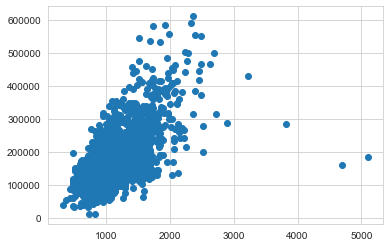

In [14]:
plt.scatter(houses_train['1st Flr SF'], houses_train['SalePrice']);

### Removing Outliers

In [15]:
def remove_outliers(data):
    return data[data['1st Flr SF'] < 3000]

houses_train = remove_outliers(houses_train)
houses_train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN

## Filling NaN Values

## Feature Engineering

### Creating Dummies

In [16]:
def category_to_bool_cols(dataframe, list_of_columns):
    for column in list_of_columns:
        dummy_split = pd.get_dummies(dataframe[column], column, drop_first = True) # Creates dummy columns with the name {column}_{value_in_row} per get_dummies documentation
        for dummy_key in dummy_split: # Iterates through dummy_key in dummy_split
            dataframe[dummy_key] = dummy_split[dummy_key] # adds new columns named {dummy_key} to original dataframe

In [17]:
houses_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [18]:
ordinal_categories = ['MS Zoning', 'Kitchen Qual', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Street', 'Bedroom AbvGr', 'Full Bath', 'Neighborhood', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Config', 'BsmtFin Type 1', 'BsmtFin Type 2','Lot Shape', 'Roof Matl', 'Roof Style', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope', 'House Style', 'Heating QC', 'Electrical', 'Garage Type', 'Pool QC', 'Fence', 'Sale Type', 'Functional', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplace Qu']
category_to_bool_cols(houses_train, ordinal_categories)

In [19]:
houses_train['gr_liv x 1st_SF'] = houses_train['Gr Liv Area'] * houses_train['1st Flr SF']
houses_train['Ovr Qual x 1st_SF'] = houses_train['Overall Qual'] * houses_train['1st Flr SF']
houses_train['Ovr Qual ^ 2'] = houses_train['Overall Qual'] ** 2

### Creating Logs

In [20]:
change_0_to_1 = lambda x: 1 if x <= 0 else x

In [21]:
def log_col(data, column):
    temp_df = data[column].apply(change_0_to_1).fillna(1)
    data[f"log_{column.replace(' ', '_').lower()}"] = np.log(temp_df)

In [22]:
def log_hist(data, column):
    plt.hist(data[column].apply(change_0_to_1).fillna(1))

In [23]:
log_col(houses_train, 'BsmtFin SF 1')
log_col(houses_train, '1st Flr SF')
log_col(houses_train, 'Lot Area')
# # log_col(houses_train, '2nd Flr SF')
# # log_col(houses_train, 'Total Bsmt SF')
# # for column in houses_train:
# #     log_col(houses_train, column)

### Choosing Features

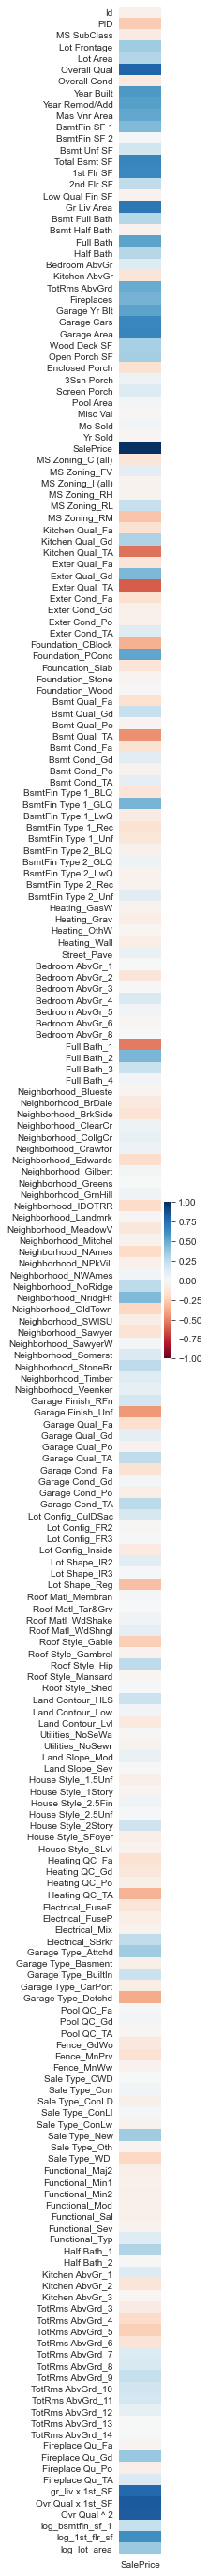

In [24]:
plt.figure(figsize=(1, 50))
sns.heatmap(houses_train.corr()[['SalePrice']], vmin=-1, vmax=1, cmap='RdBu');

In [25]:
houses_train.fillna(0, inplace=True)

In [26]:
def random_feature_thresh_test(data, target, features):
    best_threshold = 0
    best_score = float('inf')
    for i in range(0, 100):
        mean_corr = data.corr()[target].mean()
        feature_threshold = 3 + (i / 100)
        corr_greater_n_std = data.corr()[target] > mean_corr * feature_threshold
        corr_minus_n_std = data.corr()[target] < mean_corr - mean_corr * feature_threshold
        strong_corr_features = data[corr_minus_n_std.index[corr_minus_n_std | corr_greater_n_std]].columns

        features = list(strong_corr_features[1:])
        features_not_in_list = ['SalePrice', 'PID',
                                'MS SubClass']
        features = [feature for feature in features if feature not in features_not_in_list]

        X = data[features]
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=342)

        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        lr.score(X_test, y_test)
        score = metrics.mean_squared_error(y_test, y_pred, squared=False)
        if score < best_score:
            print(score)
            print("^^NEW HIGH SCORE^^")
            best_score = score
            best_threshold = feature_threshold
    return f'The best score was {best_score}, the best threshold was {best_threshold}.'
    

In [27]:
# random_feature_thresh_test(houses_train, 'SalePrice', features)

In [28]:
houses_drop_objects = houses_train

In [29]:
for column in houses_drop_objects:
    if houses_drop_objects[column].dtypes == object:
        houses_drop_objects.drop(columns=column, inplace=True)
houses_drop_objects.shape

(2045, 222)

In [30]:
def random_feature_test(data, target, all_poss_features, num_features):
    best_features = []
    best_score = float('inf')
    count = 0
    while count < 10000:
        random_features = list(np.random.choice(all_poss_features, num_features, replace=False))
#         mean_corr = data.corr()[target].mean()
#         feature_threshold = 1 + (i / 100)
#         corr_greater_n_std = data.corr()[target] > mean_corr * feature_threshold
#         corr_minus_n_std = data.corr()[target] < mean_corr - mean_corr * feature_threshold
#         strong_corr_features = data[corr_minus_n_std.index[corr_minus_n_std | corr_greater_n_std]].columns

#         features = list(strong_corr_features[1:])
        features_not_in_list = ['SalePrice', 'PID',
                                'MS SubClass', 'ID']

        for column in random_features:
            try:
                data[column].apply(lambda x: float(x))
            except:
                features_not_in_list.append(column)

        remove_features = [feature for feature in random_features if feature not in features_not_in_list]

        X = data[remove_features]
        y = data[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=342)

        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        lr.score(X_test, y_test)
        score = metrics.mean_squared_error(y_test, y_pred, squared=False)
        if score < best_score:
            print(score)
            print("^^^^^^^^^^^NEW HIGH SCORE^^^^^^^^^^^^^")
            best_score = score
            best_features = remove_features
        count += 1
    return f'The best score was {best_score}, the best features were {best_features}.'

In [31]:
# random_feature_test(houses_drop_objects, 'SalePrice', houses_drop_objects.columns, 135)

In [32]:
mean_corr = houses_train.corr()['SalePrice'].mean()

In [33]:
mean_corr

0.062143380304133494

In [34]:
feature_threshold = 3.22

corr_greater_n_std = houses_train.corr()['SalePrice'] > mean_corr * feature_threshold 

corr_minus_n_std = houses_train.corr()['SalePrice'] < mean_corr - mean_corr * feature_threshold
strong_corr_features = houses_train[corr_minus_n_std.index[corr_minus_n_std | corr_greater_n_std]].columns

features = list(strong_corr_features[1:])
features_not_in_list = ['SalePrice', 'PID',
                        'MS SubClass'
                        'MS Zoning_C (all)',
                        'Bsmt Cond_Fa',
                        'Garage Qual_Fa',
#                         'Heating_Wall'
                       ]
features = [feature for feature in features if feature not in features_not_in_list]
len(features)
# features.remove('MS Zoning_C (all)')
# features.remove('Screen Porch_210')

75

## Testing!!

### Splitting the Data

In [35]:
X = houses_train[features]
y = houses_train['SalePrice']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=342)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
cross_val_score(lr, X_train, y_train)

array([0.88487031, 0.92519665, 0.92333177, 0.9267589 , 0.90426809])

In [39]:
y_pred = lr.predict(X_test)

In [40]:
lr.score(X_test, y_test)

0.9204196312670035

In [41]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

22687.87848466017

In [42]:
resids = y_test - y_pred

In [43]:
resids[(resids < -100000) | (resids > 100000)]

1035    115574.287266
1796    151306.174182
Name: SalePrice, dtype: float64

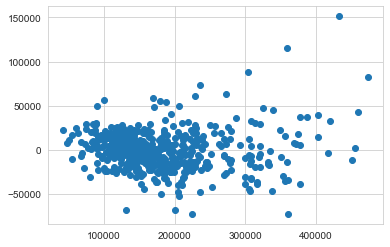

In [44]:
plt.scatter(y_pred, resids)

## Training model on all data

In [45]:
lr.fit(X, y)

LinearRegression()

## Prepping model for Kaggle Submission

In [46]:
# Garage Cars was type int64 in houses_test, was type float in houses_train
houses_test['Garage Cars'] = houses_test['Garage Cars'].apply(lambda x: float(x))

In [47]:
category_to_bool_cols(houses_test, ordinal_categories)

In [48]:
houses_test['gr_liv x 1st_SF'] = houses_test['Gr Liv Area'] * houses_test['1st Flr SF']
houses_test['Ovr Qual x 1st_SF'] = houses_test['Overall Qual'] * houses_test['1st Flr SF']
houses_test['Ovr Qual ^ 2'] = houses_test['Overall Qual'] ** 2

In [49]:
log_col(houses_test, 'BsmtFin SF 1')
log_col(houses_test, '1st Flr SF')
log_col(houses_test, 'Lot Area')

In [50]:
mean_corr

0.062143380304133494

In [51]:
feature_threshold = 3.22

In [52]:
features

['Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Full Bath',
 'Half Bath',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Kitchen Qual_Fa',
 'Kitchen Qual_Gd',
 'Kitchen Qual_TA',
 'Exter Qual_Gd',
 'Exter Qual_TA',
 'Exter Cond_Fa',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Bsmt Qual_Fa',
 'Bsmt Qual_Gd',
 'Bsmt Qual_TA',
 'BsmtFin Type 1_GLQ',
 'BsmtFin Type 1_Rec',
 'Full Bath_1',
 'Full Bath_2',
 'Full Bath_3',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_NAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Garage Finish_Unf',
 'Garage Qual_TA',
 'Garage Cond_Fa',
 'Garage Cond_TA',
 'Lot Shape_Reg',
 'Roof Style_Gable',
 'Roof Style_Hip',
 'Land Co

In [53]:
for column in houses_test:
    houses_test[column].fillna(0, inplace=True)

In [54]:
X_test = remove_outliers(houses_test)[features]

KeyError: '[1671] not found in axis'

In [ ]:
houses_test['SalePrice'] = lr.predict(X_test)

submission = houses_test[['Id', 'SalePrice']]
submission[submission['SalePrice'] < 0]
submission.describe()

In [ ]:
submission.to_csv('./submissions/test14.csv', index=False)